In [1]:
import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
import torch.optim as optim

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

from td_actor_critic_baseline import PolicyEstimator, ValueEstimator, td_actor_critic_baseline
from utils import plotting

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
env = gym.make('CartPole-v0')

[2017-06-18 01:41:24,123] Making new env: CartPole-v0


In [3]:
state_D = env.observation_space.shape[0]
action_D = env.action_space.n

policy_estimator = PolicyEstimator(state_D, action_D, hidden_size=128)
policy_optimizer = optim.Adam(policy_estimator.parameters(), lr=1e-10)

value_estimator = ValueEstimator(state_D, hidden_size=128)
value_optimizer = optim.Adam(value_estimator.parameters(), lr=5e-10)

In [4]:
stats = td_actor_critic_baseline(
    env,
    policy_estimator,
    policy_optimizer,
    value_estimator,
    value_optimizer,
    num_episodes=500,
    discount_factor=0.99,
    render=False
)

Episode 0	Running reward: 0.14
Episode 10	Running reward: 1.76
Episode 20	Running reward: 3.69
Episode 30	Running reward: 5.37
Episode 40	Running reward: 6.75
Episode 50	Running reward: 8.46
Episode 60	Running reward: 9.67
Episode 70	Running reward: 12.47
Episode 80	Running reward: 12.92
Episode 90	Running reward: 14.38
Episode 100	Running reward: 14.80
Episode 110	Running reward: 15.50
Episode 120	Running reward: 16.71
Episode 130	Running reward: 17.68
Episode 140	Running reward: 17.88
Episode 150	Running reward: 17.98
Episode 160	Running reward: 18.28
Episode 170	Running reward: 18.27
Episode 180	Running reward: 18.46
Episode 190	Running reward: 19.69
Episode 200	Running reward: 20.23
Episode 210	Running reward: 20.38
Episode 220	Running reward: 20.78
Episode 230	Running reward: 20.70
Episode 240	Running reward: 20.83
Episode 250	Running reward: 21.21
Episode 260	Running reward: 21.68
Episode 270	Running reward: 22.06
Episode 280	Running reward: 22.68
Episode 290	Running reward: 22.3

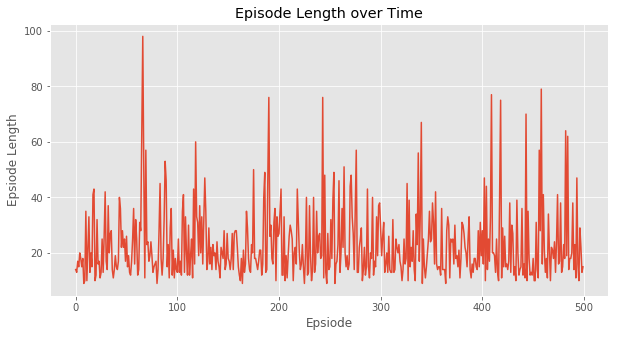

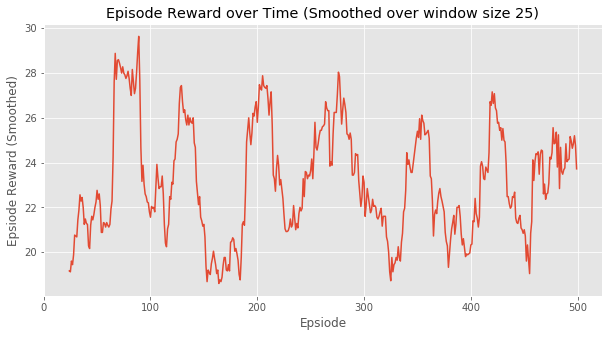

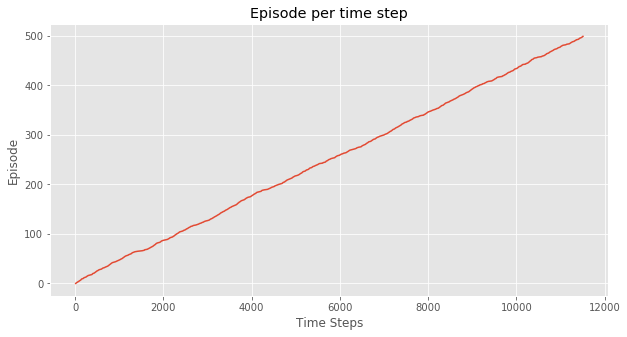

(<matplotlib.figure.Figure at 0x10d336e10>,
 <matplotlib.figure.Figure at 0x1109169b0>)

In [5]:
plotting.plot_episode_stats(stats, smoothing_window=25)